In [4]:
%matplotlib inline

from IPython import display;
from matplotlib import pyplot as plt;
from mxnet import autograd, nd;
import random;
import d2lzh;

num_inputs = 2;
num_examples = 1000;
true_w = [2, -3.4];
true_b = 4.2;
features = nd.random.normal(scale = 1, shape = (num_examples, num_inputs));
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b;
labels += nd.random.normal(scale = 0.01, shape = labels.shape);

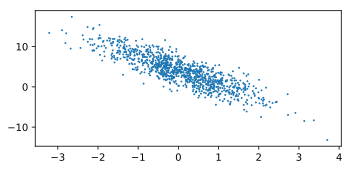

In [5]:
d2lzh.set_figsize(figsize = (5.5, 2.5));
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features);
    indices = list(range(num_examples));
    random.shuffle(indices);
    
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)]);
        yield features.take(j), labels.take(j);

In [7]:
w = nd.random.normal(scale = 0.01, shape = (num_inputs, 1));
b = nd.zeros(shape = (1, ));
w.attach_grad();
b.attach_grad();

In [8]:
def linreg(x, w, b):
    return nd.dot(x, w) + b;

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2;

def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad /batch_size;
        


In [9]:
lr = 0.01;
num_epochs = 3;
batch_size = 10;

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = squared_loss(linreg(X, w, b), y);
        l.backward();
        sgd([w, b], lr, batch_size);
    
    train_l = squared_loss(linreg(features, w, b), labels);
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()));

epoch 1, loss 2.392685
epoch 2, loss 0.373359
epoch 3, loss 0.058376


In [10]:
print(true_w, w, true_b, b);

[2, -3.4] 
[[ 1.8623056]
 [-3.199142 ]]
<NDArray 2x1 @cpu(0)> 4.2 
[3.9407642]
<NDArray 1 @cpu(0)>


In [16]:
from mxnet.gluon import data as gdata, nn, loss as gloss;
from mxnet import init, gluon;

dataset = gdata.ArrayDataset(features, labels);
data_iter = gdata.DataLoader(dataset, batch_size, shuffle = True);
net = nn.Sequential();
net.add(nn.Dense(1));

net.initialize(init.Normal(sigma = 0.01));
loss = gloss.L2Loss();
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03});

for epoch in range(num_epochs):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y);
        l.backward();
        trainer.step(batch_size);
    
    train_l = loss(net(features), labels);
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()));

epoch 1, loss 0.054281
epoch 2, loss 0.000249
epoch 3, loss 0.000050


In [21]:
print(net[0].weight.data());


[[ 1.9996403 -3.399231 ]]
<NDArray 1x2 @cpu(0)>


In [22]:
print(net[0].bias.data())


[4.1990366]
<NDArray 1 @cpu(0)>
